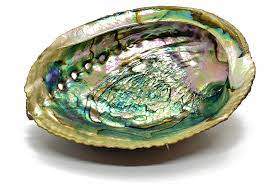

Create a vector with the following values called `header`.
- Sex
- Length                                                                                   
- Diameter                                                                                 
- Height                                                                                   
- Whole_weight
- Shucked_weight                                                 
- Viscera_weight
- Shell_weight
- Rings

In [2]:
library('tidyverse')

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.0.2     ✔ forcats 0.5.1
✔ stringr 1.4.0     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ stringr::fixed()    masks recipes::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ readr::spec()       masks yardstick::spec()



In [3]:
names = c('sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings')

Read in the abalone data. You can retrieve the link from this URL: [abalone data folder](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/)

We want the `abalone.data` file.

Use the `col_names` argument with the `names` vector from above to set the column names.

In [4]:
df_abalone = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', col_names = names)

Rows: 4177 Columns: 9

── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sex
dbl (8): length, diameter, height, whole_weight, shucked_weight, viscera_wei...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Is there any missing data? Use `filter` to find out.

In [5]:
is.na(df_abalone) %>% sum

df_abalone %>% filter(if_any(everything(), is.na))

[1] 0

sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Make a scatter plot of `Whole_weight` versus `Shucked_weight` and color the points by `Sex`.

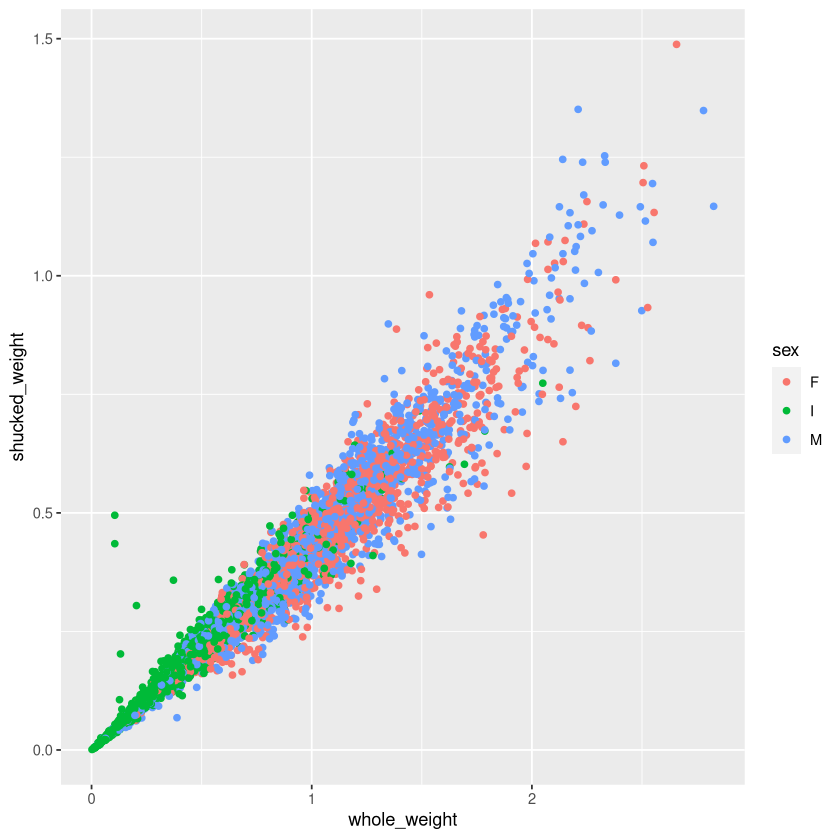

In [6]:
p = ggplot(df_abalone, aes(x = whole_weight, y = shucked_weight, color = sex))

p = p + geom_point()

p

Make a "jitter" chart where the weight catetories are on the `y-axis` and the weight values are on the `x-axis`. Order the chart by median value of each weight catetory. 

(Hint: Remember `pivot_longer`)

name,mean_weight
<chr>,<dbl>
viscera_weight,0.1805936
shell_weight,0.2388309
shucked_weight,0.3593675
whole_weight,0.8287422


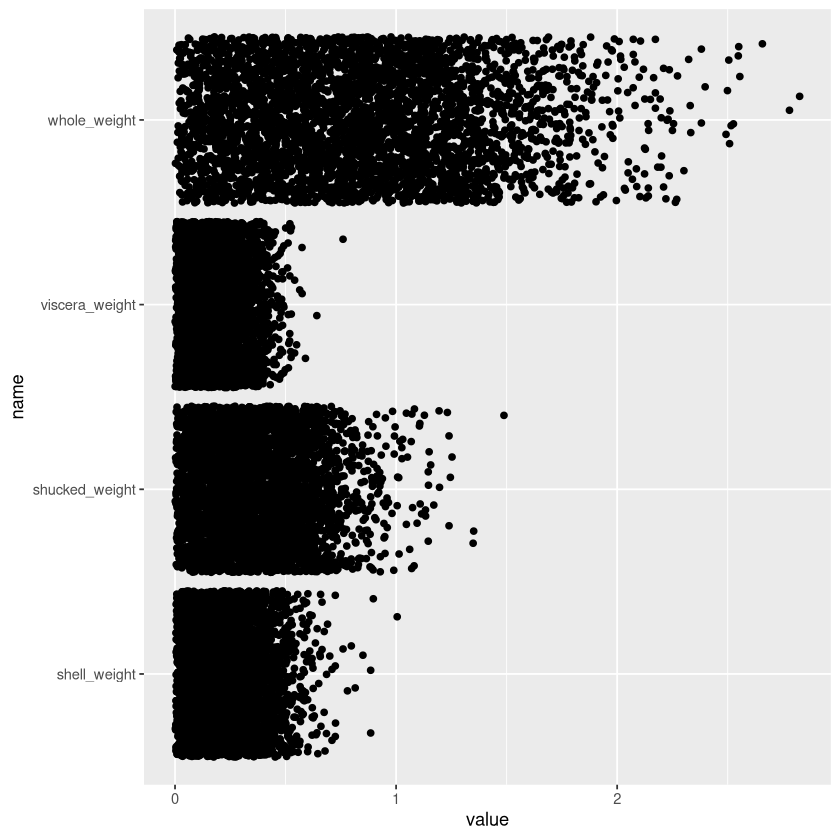

In [7]:
df_abalone_pivot = df_abalone %>% 
    pivot_longer(cols = c(whole_weight, shucked_weight, shell_weight, viscera_weight))

df_abalone_means = df_abalone_pivot %>%
    group_by(name) %>%
    summarize(mean_weight = mean(value), .groups = 'drop') %>%
    arrange(mean_weight)

df_abalone_means %>% head

p = ggplot(df_abalone_pivot, aes(x = value, y = name))

p = p + geom_point(position = position_jitter(width = 0, height = .45))

p

In [10]:
library('tidymodels')

abalone_split = initial_split(df_abalone)

abalone_split

abalone_training = training(abalone_split)

abalone_training %>% head

<Analysis/Assess/Total>
<3132/1045/4177>

sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.570,0.435,0.140,0.8085,0.3235,0.1830,0.220,16
I,0.330,0.260,0.080,0.1900,0.0765,0.0385,0.065,7
M,0.580,0.465,0.175,1.0350,0.4010,0.1865,0.385,17
M,0.635,0.525,0.160,1.1950,0.5435,0.2460,0.335,12
I,0.465,0.345,0.110,0.4415,0.1755,0.0905,0.120,7
I,0.510,0.375,0.150,0.8415,0.3845,0.1560,0.255,10
